In [88]:
import pandas as pd


from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from imblearn.combine import SMOTETomek


from xgboost import XGBClassifier

In [89]:
df_read = pd.read_csv('../datasets/cleanedfix.csv')

In [137]:
df_read.iloc[0:5, 0:7]

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle
0,17:00:00,18-30,Male,Employee,1-2yr,Private Vehicle,Owner
1,17:00:00,31-50,Male,Employee,Above 10yr,Public Transport,Owner
2,17:00:00,18-30,Male,Employee,1-2yr,Commercial Vehicle,Owner
3,01:00:00,18-30,Male,Employee,5-10yr,Public Transport,Governmental
4,01:00:00,18-30,Male,Employee,2-5yr,Private Vehicle,Owner


In [138]:
df_read.iloc[0:5, 7:14]

,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions
0,Residential areas,Two-way (divided with broken lines road marking),Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
1,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
2,Recreational areas,other,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight
3,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit
4,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit


In [140]:
df_read.iloc[0:5, 14:23]

,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Cause_of_accident,Accident_severity,Day
0,Normal,Stationary Object Collision,2,2,Moving forward,na,Moving Backward,Slight Injury,Monday
1,Normal,Vehicle Collision,2,2,Moving forward,na,Speeding,Slight Injury,Monday
2,Normal,Stationary Object Collision,2,2,Moving forward,3,Unsafe Lane Change,Serious Injury,Monday
3,Normal,Vehicle Collision,2,2,Moving forward,3,Unsafe Lane Change,Slight Injury,Sunday
4,Normal,Vehicle Collision,2,2,Moving forward,na,Speeding,Slight Injury,Sunday


buat mix 

    Time : KFOLD
    Age  : Label
    Sex_of_drive  : One hot
    vehicle driver realtion : One hot
    Driving expe : Label
    Type of vehicle : kfold target
    Owner of vehicle :  One hot
    Area accident occured : Kfold
    Lanes_or_Medians : Kfold
    Road_allignment : Kfold
    Types of Junction : Kfold
    Road_surface : Ohe
    Road_surface_conditions : ohe
    Light conditions : ohe
    Weather conditions : kfold
    Type of colision : Kfold
    Vehicle Movement : Kfold
    Casualty_severity : Kfold / Label (cek lebih lanjut)
    Cause of accident : Kfold
    Day : Ohe 





In [ ]:
df_read.iloc[0:5, 14:23]

In [90]:
fitur_kategori = df_read.columns[df_read.dtypes == 'object'].tolist()
fitur_kategori

['Time',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_severity',
 'Cause_of_accident',
 'Accident_severity',
 'Day']

In [91]:
fitur_kategori

['Time',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_severity',
 'Cause_of_accident',
 'Accident_severity',
 'Day']

In [92]:
df_read['Light_conditions'].value_counts()

Light_conditions
Daylight                   8798
Darkness - lights lit      3286
Darkness - lights unlit     232
Name: count, dtype: int64

# Encoding

In [93]:
le = LabelEncoder()
df_le = df_read.copy()

for nama_kategori in fitur_kategori:
    df_le[nama_kategori] = le.fit_transform(df_le[[nama_kategori]])


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:110: D

In [94]:
df_le.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12316 non-null  int64
 1   Age_band_of_driver           12316 non-null  int64
 2   Sex_of_driver                12316 non-null  int64
 3   Vehicle_driver_relation      12316 non-null  int64
 4   Driving_experience           12316 non-null  int64
 5   Type_of_vehicle              12316 non-null  int64
 6   Owner_of_vehicle             12316 non-null  int64
 7   Area_accident_occured        12316 non-null  int64
 8   Lanes_or_Medians             12316 non-null  int64
 9   Road_allignment              12316 non-null  int64
 10  Types_of_Junction            12316 non-null  int64
 11  Road_surface_type            12316 non-null  int64
 12  Road_surface_conditions      12316 non-null  int64
 13  Light_conditions             12316 non-null  i

In [95]:
df_read['Day'].head(20)

0        Monday
1        Monday
2        Monday
3        Sunday
4        Sunday
5        Friday
6     Wednesday
7        Friday
8        Friday
9        Friday
10     Saturday
11     Saturday
12     Thursday
13     Thursday
14     Thursday
15       Monday
16       Monday
17       Monday
18       Monday
19      Tuesday
Name: Day, dtype: object

In [96]:
X = df_le.drop(columns=['Accident_severity'])
y = df_le['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [97]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
le_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
le_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
le_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
le_xgb_cv = xgb_cv_scores.mean()

le_rf_accuracy, le_xgb_acccuracy, le_rv_cv, le_xgb_cv

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:17:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:17:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:17:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:17:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

(0.8486201298701299,
 0.8469967532467533,
 np.float64(0.8481644903006048),
 np.float64(0.8362279265598389))

# Ohe

In [98]:
df_ohe = df_read.copy()

le_target = LabelEncoder()
df_ohe['Accident_severity'] = le_target.fit_transform(df_ohe['Accident_severity'])

categorical_features = df_ohe.select_dtypes(include=['object']).columns.tolist()

ohe = OneHotEncoder(drop='first', sparse_output=False) 
ohe_encoded = ohe.fit_transform(df_ohe[categorical_features])

ohe_df = pd.DataFrame(ohe_encoded, columns=ohe.get_feature_names_out(categorical_features))

df_ohe.drop(columns=categorical_features, inplace=True)
df_ohe = pd.concat([df_ohe, ohe_df], axis=1)

df_ohe.head()


,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Time_01:00:00,Time_02:00:00,Time_03:00:00,Time_04:00:00,Time_05:00:00,Time_06:00:00,Time_07:00:00,...,Cause_of_accident_Reckless Driving,Cause_of_accident_Speeding,Cause_of_accident_Unknown,Cause_of_accident_Unsafe Lane Change,Day_Monday,Day_Saturday,Day_Sunday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,2,2,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [99]:
X = df_ohe.drop(columns=['Accident_severity'])
y = df_ohe['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [100]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
ohe_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
ohe_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
ohe_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
ohe_xgb_cv = xgb_cv_scores.mean()

ohe_rf_accuracy, ohe_xgb_acccuracy, ohe_rv_cv, ohe_xgb_cv

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:17:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

(0.8494318181818182,
 0.8518668831168831,
 np.float64(0.8471903325054969),
 np.float64(0.8401253486667615))

# Target

In [ ]:

df_target = df_read.copy()

if df_target['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_target['Accident_severity'] = le_target.fit_transform(df_target['Accident_severity'])

for col in categorical_features:
    mean_encoded = df_target.groupby(col)['Accident_severity'].mean()
    df_target[col] = df_target[col].map(mean_encoded)

df_target.head()

,Time,Age_band_of_driver,Sex_of_driver,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,...,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_severity,Cause_of_accident,Accident_severity,Day
0,1.857492,1.829548,1.831687,1.834705,1.846241,1.832636,1.831003,1.806796,1.830692,1.832846,...,1.841328,1.826692,1.823370,2,2,1.834038,1.840198,1.811785,2,1.864366
1,1.857492,1.841204,1.831687,1.834705,1.831565,1.831015,1.831003,1.839757,1.829294,1.832846,...,1.841328,1.826692,1.838056,2,2,1.834038,1.840198,1.796992,2,1.864366
2,1.857492,1.829548,1.831687,1.834705,1.846241,1.826065,1.831003,1.831804,1.827711,1.832846,...,1.841328,1.826692,1.823370,2,2,1.834038,1.826456,1.831183,1,1.864366
3,1.813433,1.829548,1.831687,1.834705,1.834685,1.831015,1.843420,1.839757,1.827711,1.838323,...,1.818320,1.826692,1.838056,2,2,1.834038,1.826456,1.831183,2,1.822768
4,1.813433,1.829548,1.831687,1.834705,1.818982,1.832636,1.831003,1.842105,1.827711,1.832846,...,1.818320,1.826692,1.838056,2,2,1.834038,1.840198,1.796992,2,1.822768


In [ ]:
X = df_target.drop(columns=['Accident_severity'])
y = df_target['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [103]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
target_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
target_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
target_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
target_xgb_cv = xgb_cv_scores.mean()

target_rf_accuracy, target_xgb_acccuracy, target_rv_cv, target_xgb_cv

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

(0.8494318181818182,
 0.8526785714285714,
 np.float64(0.8476775761794032),
 np.float64(0.8394760309726814))

# KFOLD

In [104]:

df_kfold = df_read.copy()

# Label encode target class jika masih bertipe object
if df_kfold['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_kfold['Accident_severity'] = le_target.fit_transform(df_kfold['Accident_severity'])

# K-Fold Target Encoding
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for col in categorical_features:
    df_kfold[col + '_kfold'] = 0  # Buat kolom baru untuk hasil encoding
    
    for train_idx, val_idx in kf.split(df_kfold):
        train_mean = df_kfold.iloc[train_idx].groupby(col)['Accident_severity'].mean()
        df_kfold.loc[val_idx, col + '_kfold'] = df_kfold.loc[val_idx, col].map(train_mean)

# Hapus kolom asli yang sudah diencode
df_kfold.drop(columns=categorical_features, inplace=True)

# Menampilkan hasil setelah K-Fold Target Encoding
df_kfold.head()


/tmp/ipykernel_6379/1027782405.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.85570131 1.82653061 1.85570131 ... 1.85570131 1.86577181 1.83546326]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_kfold.loc[val_idx, col + '_kfold'] = df_kfold.loc[val_idx, col].map(train_mean)
/tmp/ipykernel_6379/1027782405.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.83089097 1.83089097 1.83089097 ... 1.84764543 1.83089097 1.83089097]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_kfold.loc[val_idx, col + '_kfold'] = df_kfold.loc[val_idx, col].map(train_mean)
/tmp/ipykernel_6379/1027782405.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.833770

,Number_of_vehicles_involved,Number_of_casualties,Accident_severity,Time_kfold,Age_band_of_driver_kfold,Sex_of_driver_kfold,Vehicle_driver_relation_kfold,Driving_experience_kfold,Type_of_vehicle_kfold,Owner_of_vehicle_kfold,...,Types_of_Junction_kfold,Road_surface_type_kfold,Road_surface_conditions_kfold,Light_conditions_kfold,Weather_conditions_kfold,Type_of_collision_kfold,Vehicle_movement_kfold,Casualty_severity_kfold,Cause_of_accident_kfold,Day_kfold
0,2,2,2,1.855701,1.830891,1.833770,1.837312,1.845552,1.834917,1.833485,...,1.813072,1.835297,1.835007,1.842031,1.829922,1.825017,1.836953,1.844619,1.815470,1.866815
1,2,2,2,1.858596,1.840148,1.830835,1.832541,1.830313,1.826701,1.830113,...,1.810311,1.831333,1.832350,1.840485,1.827286,1.837321,1.831884,1.838223,1.787938,1.862172
2,2,2,1,1.848884,1.826391,1.828584,1.831288,1.839888,1.826671,1.826703,...,1.808277,1.829597,1.827669,1.838567,1.822341,1.821695,1.828302,1.821749,1.826594,1.861070
3,2,2,2,1.826531,1.830891,1.833770,1.837312,1.837806,1.833333,1.840347,...,1.835722,1.832787,1.835007,1.826811,1.829922,1.841692,1.836953,1.828294,1.831213,1.829694
4,2,2,2,1.827273,1.829781,1.830835,1.832541,1.815098,1.828336,1.830113,...,1.828313,1.831333,1.832350,1.815136,1.827286,1.837321,1.831884,1.838223,1.787938,1.819897


In [105]:
X = df_kfold.drop(columns=['Accident_severity'])
y = df_kfold['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [106]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
kfold_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
kfold_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
kfold_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
kfold_xgb_cv = xgb_cv_scores.mean()

kfold_rf_accuracy, kfold_xgb_acccuracy, kfold_rv_cv, kfold_xgb_cv

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:18:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:19:24] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:19:26] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:19:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

(0.8449675324675324,
 0.8388798701298701,
 np.float64(0.8468656242255511),
 np.float64(0.8377711230101607))

# MIX

In [ ]:
df_mix = df_read.copy()

if df_mix['Accident_severity'].dtype == 'object':
    le_target = LabelEncoder()
    df_mix['Accident_severity'] = le_target.fit_transform(df_mix['Accident_severity'])

label_encoding_cols = ['Owner_of_vehicle', 'Vehicle_driver_relation', 'Casualty_severity', 'Driving_experience', 'Age_band_of_driver']   

one_hot_encoding_cols = ['Sex_of_driver','Type_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Cause_of_accident']


kfold_encoding_cols = ['Time',  'Road_surface_type', 'Road_surface_conditions', 
                       'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Day']

for col in label_encoding_cols:
    le = LabelEncoder()
    df_mix[col] = le.fit_transform(df_mix[col])

df_mix = pd.get_dummies(df_mix, columns=one_hot_encoding_cols, dtype=int)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
for col in kfold_encoding_cols:
    df_mix[col + '_kfold'] = 0  
    for train_idx, val_idx in kf.split(df_mix):
        train_mean = df_mix.iloc[train_idx].groupby(col)['Accident_severity'].mean()
        df_mix.loc[val_idx, col + '_kfold'] = df_mix.loc[val_idx, col].map(train_mean)

df_mix.drop(columns=kfold_encoding_cols, inplace=True)

df_mix.head()

/tmp/ipykernel_6379/711334802.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.85570131 1.82653061 1.85570131 ... 1.85570131 1.86577181 1.83546326]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mix.loc[val_idx, col + '_kfold'] = df_mix.loc[val_idx, col].map(train_mean)
/tmp/ipykernel_6379/711334802.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.83529668 1.83278689 1.83278689 ... 1.83529668 1.83529668 1.83529668]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_mix.loc[val_idx, col + '_kfold'] = df_mix.loc[val_idx, col].map(train_mean)
/tmp/ipykernel_6379/711334802.py:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1.83500737 1.835007

,Age_band_of_driver,Vehicle_driver_relation,Driving_experience,Owner_of_vehicle,Number_of_vehicles_involved,Number_of_casualties,Casualty_severity,Accident_severity,Sex_of_driver_Female,Sex_of_driver_Male,...,Cause_of_accident_Unknown,Cause_of_accident_Unsafe Lane Change,Time_kfold,Road_surface_type_kfold,Road_surface_conditions_kfold,Light_conditions_kfold,Weather_conditions_kfold,Type_of_collision_kfold,Vehicle_movement_kfold,Day_kfold
0,0,0,0,3,2,2,3,2,0,1,...,0,0,1.855701,1.835297,1.835007,1.842031,1.829922,1.825017,1.836953,1.866815
1,1,0,3,3,2,2,3,2,0,1,...,0,0,1.858596,1.831333,1.832350,1.840485,1.827286,1.837321,1.831884,1.862172
2,0,0,0,3,2,2,2,1,0,1,...,0,1,1.848884,1.829597,1.827669,1.838567,1.822341,1.821695,1.828302,1.861070
3,0,0,2,0,2,2,2,2,0,1,...,0,1,1.826531,1.832787,1.835007,1.826811,1.829922,1.841692,1.836953,1.829694
4,0,0,1,3,2,2,3,2,0,1,...,0,0,1.827273,1.831333,1.832350,1.815136,1.827286,1.837321,1.831884,1.819897


In [108]:
X = df_mix.drop(columns=['Accident_severity'])
y = df_mix['Accident_severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [109]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
mix_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
mix_xgb_acccuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')
mix_rv_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')
mix_xgb_cv = xgb_cv_scores.mean()

mix_rf_accuracy, mix_xgb_acccuracy, mix_rv_cv, mix_xgb_cv

/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:19:40] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:19:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:19:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

(0.846185064935065,
 0.8469967532467533,
 np.float64(0.8460538370480515),
 np.float64(0.8388265155469785))

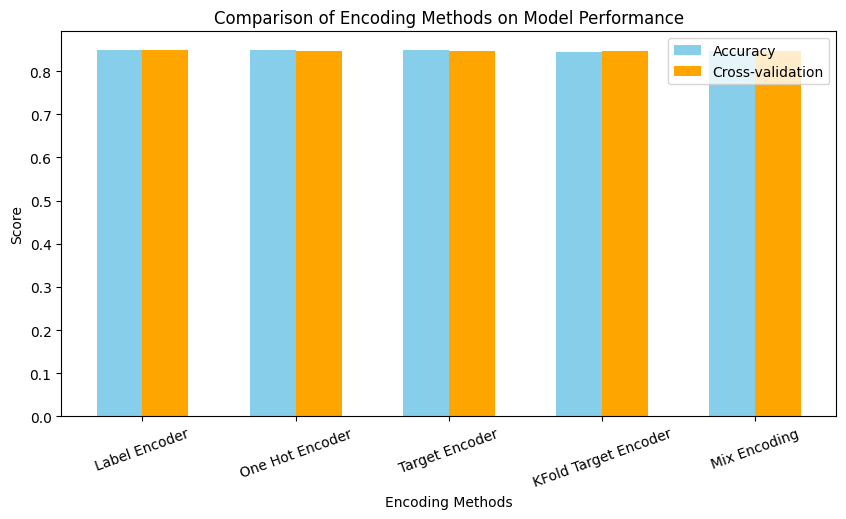

In [110]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk perbandingan encoding
encoding_methods = ['Label Encoder', 'One Hot Encoder', 'Target Encoder', 'KFold Target Encoder', 'Mix Encoding']
accuracy_scores = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, mix_rf_accuracy]
cv_scores = [le_rv_cv, ohe_rv_cv, target_rv_cv, kfold_rv_cv, mix_rv_cv]

# Grafik perbandingan
x = np.arange(len(encoding_methods))
width = 0.3

fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(x - width/2, accuracy_scores, width, label='Accuracy', color='skyblue')
ax.bar(x + width/2, cv_scores, width, label='Cross-validation', color='orange')

# Labeling
ax.set_xlabel('Encoding Methods')
ax.set_ylabel('Score')
ax.set_title('Comparison of Encoding Methods on Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(encoding_methods, rotation=20)
ax.legend()

plt.show()


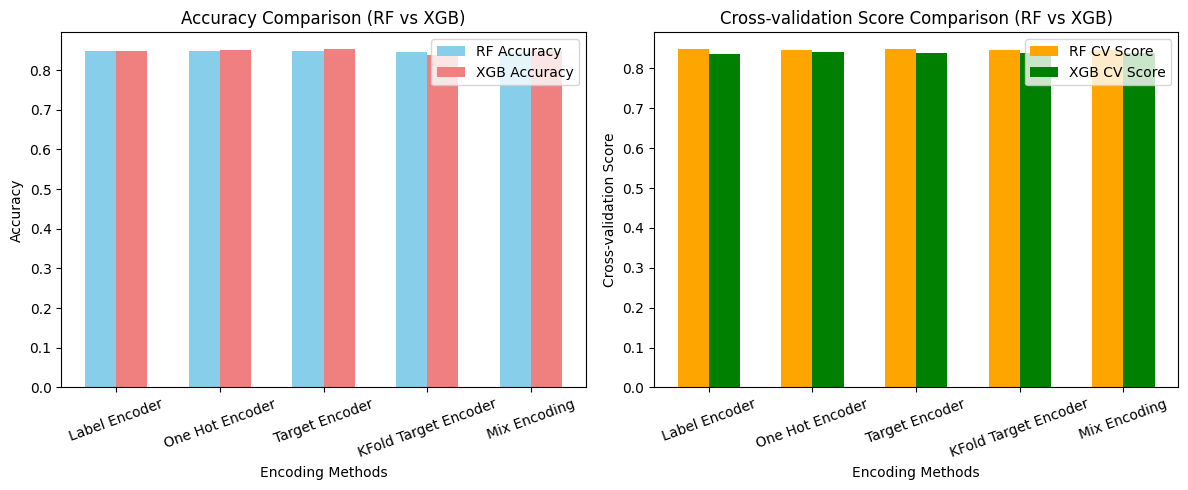

In [111]:
# Data perbandingan Random Forest dan XGBoost
accuracy_rf = [le_rf_accuracy, ohe_rf_accuracy, target_rf_accuracy, kfold_rf_accuracy, mix_rf_accuracy]
cv_rf = [le_rv_cv, ohe_rv_cv, target_rv_cv, kfold_rv_cv, mix_rv_cv]

accuracy_xgb = [le_xgb_acccuracy, ohe_xgb_acccuracy, target_xgb_acccuracy, kfold_xgb_acccuracy, mix_xgb_acccuracy]
cv_xgb = [le_xgb_cv, ohe_xgb_cv, target_xgb_cv, kfold_xgb_cv, mix_xgb_cv]

# Grafik perbandingan
x = np.arange(len(encoding_methods))
width = 0.3

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot untuk Accuracy
axes[0].bar(x - width/2, accuracy_rf, width, label='RF Accuracy', color='skyblue')
axes[0].bar(x + width/2, accuracy_xgb, width, label='XGB Accuracy', color='lightcoral')
axes[0].set_xlabel('Encoding Methods')
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Accuracy Comparison (RF vs XGB)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(encoding_methods, rotation=20)
axes[0].legend()

# Plot untuk Cross-validation
axes[1].bar(x - width/2, cv_rf, width, label='RF CV Score', color='orange')
axes[1].bar(x + width/2, cv_xgb, width, label='XGB CV Score', color='green')
axes[1].set_xlabel('Encoding Methods')
axes[1].set_ylabel('Cross-validation Score')
axes[1].set_title('Cross-validation Score Comparison (RF vs XGB)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(encoding_methods, rotation=20)
axes[1].legend()

plt.tight_layout()
plt.show()


In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(X_train, y_train)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_resampled, y_resampled)
rf_pred = rf_model.predict(X_test)
smote_rf_accuracy = accuracy_score(y_test, rf_pred)

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_resampled, y_resampled)
xgb_pred = xgb_model.predict(X_test)
smote_xgb_accuracy = accuracy_score(y_test, xgb_pred)

rf_cv_scores = cross_val_score(rf_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
smote_rf_cv = rf_cv_scores.mean()

xgb_cv_scores = cross_val_score(xgb_model, X_resampled, y_resampled, cv=5, scoring='accuracy')
smote_xgb_cv = xgb_cv_scores.mean()

smote_rf_accuracy, smote_xgb_accuracy, smote_rf_cv, smote_xgb_cv, rf_cv_scores, xgb_cv_scores


/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:20:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/envs/bccintern/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [11:21:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/ahmadnafim/anaconda3/e

(0.8392422192151556,
 0.8400541271989175,
 np.float64(0.9400059936559264),
 np.float64(0.9263485043065879),
 array([0.7692484 , 0.98556039, 0.98326839, 0.97960119, 0.98235159]),
 array([0.70737855, 0.98212239, 0.98212239, 0.97776759, 0.98235159]))

Accident_severity
0    7290
2    7263
1    7263
Name: count, dtype: int64

In [129]:
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

df_resampled = df_resampled.drop_duplicates()

In [130]:
df_resampled['Accident_severity'].value_counts()

Accident_severity
2    7263
1    7253
0    7230
Name: count, dtype: int64

In [123]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from category_encoders.woe import WOEEncoder
from sklearn.preprocessing import LabelEncoder

# Salin dataset untuk menghindari modifikasi langsung pada data asli
df = df_read.copy()

# Memastikan target ada di dataset
target_col = 'Accident_severity'
if target_col not in df.columns:
    raise ValueError(f"Kolom target '{target_col}' tidak ditemukan dalam dataset.")

# Encoding target dengan LabelEncoder
le_target = LabelEncoder()
df[target_col] = le_target.fit_transform(df[target_col])

# Memisahkan fitur kategorikal dan numerik
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
numerical_features = df.select_dtypes(exclude=['object']).columns.tolist()

y = df[target_col]
X = df.drop(columns=[target_col])

# Membagi data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Encoding fitur kategorikal dengan Weight of Evidence (WOE)
woe_encoder = WOEEncoder(cols=categorical_features)
X_train_woe = woe_encoder.fit_transform(X_train, y_train)
X_test_woe = woe_encoder.transform(X_test)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_woe, y_train)
rf_pred = rf_model.predict(X_test_woe)
woe_rf_accuracy = accuracy_score(y_test, rf_pred)

# Model XGBoost (Mode Multi-Kelas dengan `objective='multi:softmax'`)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', objective='multi:softmax', num_class=len(np.unique(y)), random_state=42)
xgb_model.fit(X_train_woe, y_train)
xgb_pred = xgb_model.predict(X_test_woe)
woe_xgb_accuracy = accuracy_score(y_test, xgb_pred)

# Cross Validation untuk Random Forest
rf_cv_scores = cross_val_score(rf_model, X_train_woe, y_train, cv=5, scoring='accuracy')
woe_rf_cv = rf_cv_scores.mean()

# Cross Validation untuk XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X_train_woe, y_train, cv=5, scoring='accuracy')
woe_xgb_cv = xgb_cv_scores.mean()

# Output hasil
(woe_rf_accuracy, woe_xgb_accuracy, woe_rf_cv, woe_xgb_cv)


ValueError: The target column y must be binary. But the target contains 3 unique value(s).

In [126]:
y_train.value_counts()

Accident_severity
2    8331
1    1394
0     127
Name: count, dtype: int64

In [122]:
df.columns

Index(['Time', 'Age_band_of_driver', 'Sex_of_driver',
       'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_severity',
       'Cause_of_accident', 'Accident_severity', 'Day'],
      dtype='object')